# Data Challenge Stefano Molina
July 2024

Hello from Cinépolis! :)

Read all the assignment before you start coding.

You will be given 5 datasets:

1. Emails.csv, a csv with rows that represent an email sent to each customer
2. Transactions.csv, a csv with transactional data for a select number of theaters
3. Pricebook.csv, a csv with the full price for an adult ticket of a select number of theaters (these should be the same as those found in the transactions file)
4. Releases.csv, a csv with the release date of movies in 2024 and the total number of tickets sold for each movie
5. Customers.csv, a csv with the ids of customers so you can join communications and transactions

Instructions:
- Try to do as many tasks as you can within the provided timeframe.
- Do not return any data, we're only interested in the code.
- Your deliverable must be a jupyter notebook saved as HTML (or something similar), with the outputs you want us to look at, and without any unnecessary code.

Some tips:
- Do not assume we will infer anything from your code. Explain what you're doing, why you're doing it, what you interpret from your results, and what questions you have of your own.
- State any assumptions or comments explicitly in the code.
- Code doesn't have to be perfect, but keep it readable. If it's not readable, we'll be sad. If we're sad, we probably won't want to interview you.
- We recommend that you work no more than 5 hours on this assignment.
- If you need more time, ask.
- If you have any questions, ask.

## Task 1
You just started your new job at Cinépolis (yay!), and you're eager to better understand the industry you're working for. You already have a bunch of data, and you would like to know the behavior of customer attendance to theaters.

Perform an EDA of the transactions. Here are some recommendations:
   - Try to find seasonal patterns and describe any you might find.
   - It might be useful to check the Releases.csv file, as it will tell you the release dates of movies, as well as how popular they were. You might be able to correlate attendance with some movies with which you might be familiar.
   - Do you see any unexpected spikes in attendance? Make a hypothesis of what could those be.
   - Is there any difference between theater brands? What can you say about prices and attendance by brand?
   - How many days do people wait before buying tickets for their movies?

In [ ]:
#relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#import releases and transactions files

rel = pd.read_csv('/Users/Stefano_1/Documents/Data/Cinepolis/Releases.csv', delimiter='|')
tra = pd.read_csv('/Users/Stefano_1/Documents/Data/Cinepolis/Transactions.csv')

In [ ]:
tra.shape

(329580, 8)

In [ ]:
#check the structure of the tansactions data.
#if needed, the card membership id could be modified to shorten the values
tra.head()

,ID_CINE,FECHA_TRANSACCION,FECHA_FUNCION,CARD_MEMBERSHIPID,ID_MARCA,TX_PELICULA_UNICA,BOLETOS,IMPORTE_TAQUILLA
0,219,2024-06-13,2024-06-13,4f01380467cb31bd50a00d8eba4d7ac788caedf0c64477...,1,INTENSAMENTE 2,1,195.0
1,219,2024-06-13,2024-06-14,eba23e28e2ca059479721104ae827b5a18c85683b4131a...,1,INTENSAMENTE 2,2,200.0
2,219,2024-06-13,2024-06-13,7b4a2ea46a0f3324a47a4b549a2e87f755af7ccaa18898...,1,INTENSAMENTE 2,2,200.0
3,219,2024-06-13,2024-06-14,b4e1a90bec8442a953735d09d33599c0c8c9772611de12...,1,INTENSAMENTE 2,4,588.0
4,219,2024-06-13,2024-06-13,e56ef40fd62c2ec123072a5a793ae8afce2d094e9098e3...,1,LOS EXTRAÑOS: CAPÍTULO 1,2,200.0


In [ ]:
rel.sort_values('VENTAS', ascending=False).head(10)

,TX_PELICULA_UNICA,ESTRENO,VENTAS
236,INTENSAMENTE 2,2024-06-13,6156314
243,KUNG FU PANDA 4,2024-03-03,2423042
275,MI VILLANO FAVORITO 4,2024-07-04,2351192
217,GODZILLA Y KONG:EL NUEVO IMPERIO,2024-03-27,2249717
109,EL PLANETA DE LOS SIMIOS: NUEVO,2024-05-09,1578195
208,GARFIELD: FUERA DE CASA,2024-04-30,1488646
50,BAD BOYS HASTA LA MUERTE,2024-06-06,1277017
393,UN LUGAR EN SILENCIO: DÍA UNO,2024-06-21,1209590
94,DUNA PARTE DOS,2024-02-29,1004194
31,AMIGOS IMAGINARIOS,2024-05-15,879858


# 1
Se empieza con una gráfica de línea para cada día en la base y su respectivo ingreso acumulado. También se marcan los domingos donde se puede identificar que por lo general los fines de semana tienden a presentar mayores ingresos a excepción de contadas ocasiones como se observa a mediados de Junio, donde es probable que Intensamente 2 haya generado mayor tráfico los días previos.

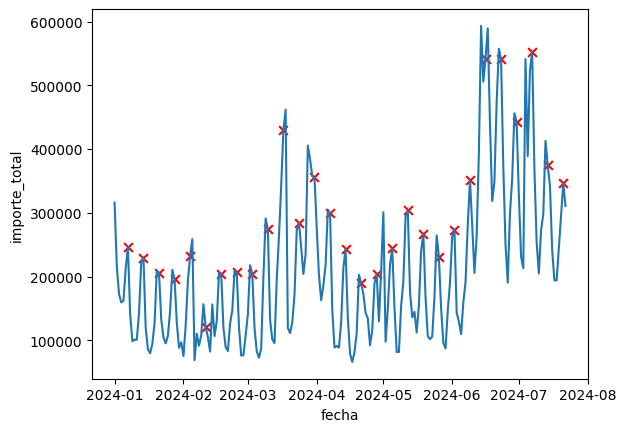

In [ ]:
#summarise the data to create a time series with daily revenue
daily_revenue = tra.groupby('FECHA_TRANSACCION')['IMPORTE_TAQUILLA'].sum().reset_index()
daily_revenue.columns = ['fecha', 'importe_total']
daily_revenue['fecha'] = pd.to_datetime(daily_revenue['fecha'])

sns.lineplot(data = daily_revenue, x = 'fecha', y = 'importe_total')

#highlight sundays
sundays = daily_revenue[daily_revenue['fecha'].dt.dayofweek == 6]
plt.scatter(sundays['fecha'], sundays['importe_total'], color='red', s=40, marker='x')

plt.show()

Para verificar la afirmación de la gráfica pasada, se incluyen las fechas de estreno del top 10 de películas por ingresos. Casi todas las películas están alineadas con un incremento inmediato en taquilla a los pocos días a excepción de Duna Parte Dos y Kung Fu Panda 4. Después de una revisión rápida en internet, se encuentra que Duna Parte Dos en realidad se estrenó el 15 de Marzo mientras que Kung Fu Panda 4, el 8 de Marzo. Al revisar estas fechas sí se observa un incremento en ingresos de taquilla.

Se observan pocos incrementos inesperados de ingresos, pero es posible identificar que Intensamente 2 genero un pico inusual en viernes -exactamente en la fecha de estreno- a diferencia de la mayoría de las demás películas. También durante finales de Marzo y principios de Abril se percibe un aumento inusual en taquilla entre semana, esto está relacionado a las vacaciones de Semana Santa y Pascua.

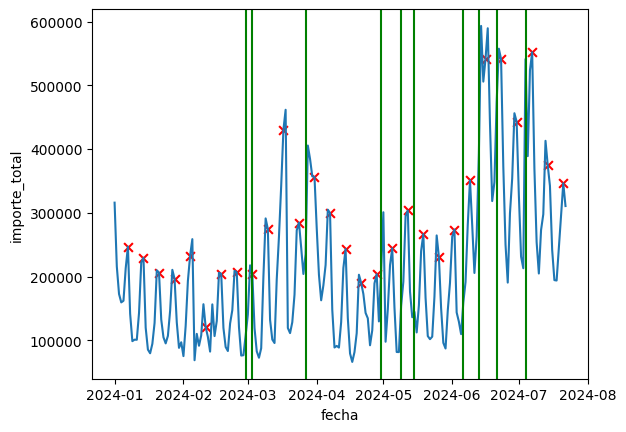

In [ ]:
#let's try to overlap the premiere date of the top 10 movies with the time series
top_10 = rel.sort_values('VENTAS', ascending=False).head(10)

sns.lineplot(data = daily_revenue, x = 'fecha', y = 'importe_total')

#highlight sundays
sundays = daily_revenue[daily_revenue['fecha'].dt.dayofweek == 6]
plt.scatter(sundays['fecha'], sundays['importe_total'], color='red', s=40, marker='x')

for date in top_10.ESTRENO:
    plt.axvline(pd.to_datetime(date), color = 'green')

plt.show()


En distintas marcas de cines, la diferencia en el desempeño de taquilla es importante. La marca 1, la cual es posible que sea Cinépolis clásico, es la que más genera aunque existe la posibilidad de que también sea la que más locaciones y asientos tiene. Para poder determinar el desempeño real habría que calcular la ganancia por boleto. También se podría hacer este ejercicio para calcular la ganancia promedio por cine para cada marca para poder comparar su desempeño de manera más objetiva.

/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/256579363.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/256579363.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/256579363.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)


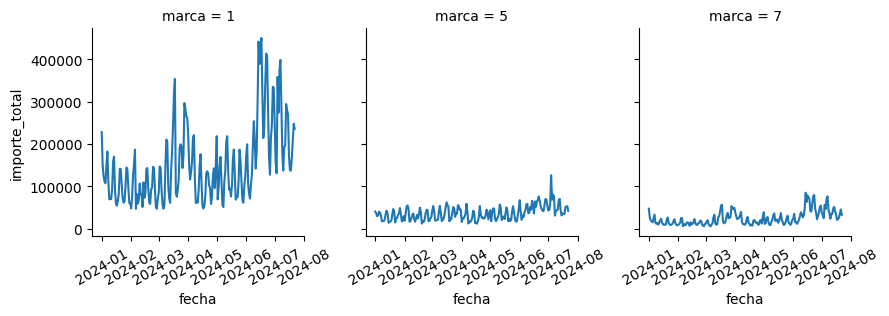

In [ ]:
#summarise the data to create a time series with daily revenue
daily_revenue = tra.groupby(['FECHA_TRANSACCION', 'ID_MARCA'])['IMPORTE_TAQUILLA'].sum().reset_index()
daily_revenue.columns = ['fecha', 'marca', 'importe_total']
daily_revenue['fecha'] = pd.to_datetime(daily_revenue['fecha'])

p = sns.FacetGrid(daily_revenue, col='marca')
p.map(sns.lineplot, 'fecha', 'importe_total')

for axes in p.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
plt.show()

Mientras en la gráfica anterior se observa que las ganancias totales son mayores en la marca 1, en la siguiente gráfica es posible ver que los precios en la marca 5 son mayores (probablemente Cinépolis VIP), por lo que dividiendo por la asistencia se puede observar que la ganancia por boleto en promedio es cerca o más del doble en esta marca. La marca 7 parece tener una ganancia promedio menor que la marca 1. (¿Esta marca podría ser algún tipo de cines que casi no se anuncian que son más baratos?)

/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/3460618177.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/3460618177.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/3460618177.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)


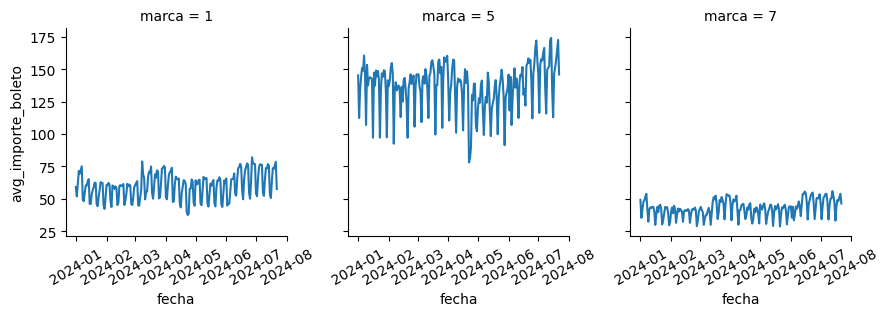

In [ ]:
#summarise the data to create a time series with daily revenue
daily_revenue = tra.groupby(['FECHA_TRANSACCION', 'ID_MARCA']).agg(
    Importe_total = pd.NamedAgg('IMPORTE_TAQUILLA', 'sum'),
    Boletos = pd.NamedAgg('BOLETOS', 'sum')
).reset_index()
daily_revenue.columns = ['fecha', 'marca', 'importe_total', 'boletos']
daily_revenue['avg_importe_boleto'] = daily_revenue['importe_total']/daily_revenue['boletos']
daily_revenue['fecha'] = pd.to_datetime(daily_revenue['fecha'])

p = sns.FacetGrid(daily_revenue, col='marca')
p.map(sns.lineplot, 'fecha', 'avg_importe_boleto')

for axes in p.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
plt.show()

Comparando la fecha de transacción y de función, es posible determinar que la gran mayoría de los clientes compran sus boletos sin mucha anticipación, por lo general el mismo día en casi todos los casos, como muestra la gráfica a continuación. El tiempo promedio de diferencia entre compra y función es de 0.64 días, por lo que se espera que el comprador promedio al hacer una compra, ésta sea para el mismo día en que hace la transacción.
Por otro lado, el número máximo de días con el que se realizó una compra anticipada fue de 61 días, lo cual resulta inusual dado que la mayoría de las películas, incluso en preventa, no presentan preventa con tanta anticipación.

In [ ]:
tra['FECHA_FUNCION'] = pd.to_datetime(tra['FECHA_FUNCION'])
tra['FECHA_TRANSACCION'] = pd.to_datetime(tra['FECHA_TRANSACCION'])

<Axes: >

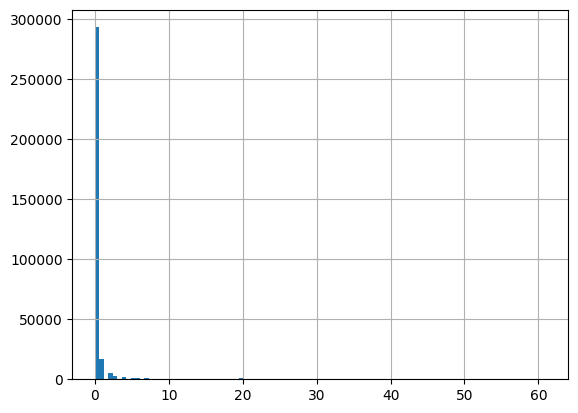

In [ ]:
tra['date_diff'] = (tra['FECHA_FUNCION']-tra['FECHA_TRANSACCION'])/np.timedelta64(1,'D')

tra['date_diff'].hist(bins=100)

In [ ]:
tra.date_diff.max()

61.0

## Task 2
Perform some further analysis with customers:
   - Can you make a segmentation for the customers based on their transactional data? Explain which variables you are including for this segmentation and why you included them.
   - You will notice many customers do not pay full price for their tickets. Where do customers pay the lowest price difference vs the full-ticket price?
   - Do you think certain movies affect how much customers are willing to pay for a ticket? Analyze the average ticket price based on movie popularity. We suggest you use this classification for movies based on attendance: less than 1 million tickets, between 1 and 3 million, and over 3 million tickets.
   - Some theaters will receive more customers than others. Which are the top theaters? Is there any difference between brands? While you might not know the theater names, what can you tell us about the top performers?

In [ ]:
#Import customers data
cus = pd.read_csv('/Users/Stefano_1/Documents/Data/Cinepolis/Customers.csv')

In [ ]:
cus.head()

,CARD_MEMBERSHIPID,SubscriberKey
0,2b8e97ef50184e4ba7205b3d182e469e664594db8dbc04...,039cea23d6666fe9476d1f45478b880f564e007cf73325...
1,19d05a23131b3784beaec65a61991ab63d69543611db86...,5ac6a4ff355413bcc1a2e2649066604de3bbb2d6bb3cd8...
2,83b61b797976d6e4c01485d6e55be0cb8f2562f2fbe4d5...,8da643428f49be37a7ee7e208da6fb4bcc03f384bd84f9...
3,008a4826d2799d626fe972194d15a604503c13576715a7...,5ff176112ccc49c22096ef759ffff0f75c291f0c3360d2...
4,d1ec1403c54e306bb9013c93ab46d98eb83a3d5a3b6b0b...,b621416877fca03f0c648d2e703ba2021c3a7401a21e71...


Revisar si existen nulls en SubscriberKey para empezar por segmentar clientes registrados. Viendo los datos, todos los clientes parecen estar registrados en Cinépolis por lo que se buscan otras variables para segmentar.

In [ ]:
tra.shape

(329580, 9)

In [ ]:
#Join transactions and customers table to check for membership
tra = tra.merge(cus, how='left', left_on='CARD_MEMBERSHIPID', right_on='CARD_MEMBERSHIPID')
tra.head()

,ID_CINE,FECHA_TRANSACCION,FECHA_FUNCION,CARD_MEMBERSHIPID,ID_MARCA,TX_PELICULA_UNICA,BOLETOS,IMPORTE_TAQUILLA,date_diff,SubscriberKey
0,219,2024-06-13,2024-06-13,4f01380467cb31bd50a00d8eba4d7ac788caedf0c64477...,1,INTENSAMENTE 2,1,195.0,0.0,7b5beefb21116a4d4d4ee03dab00e5ab0aef537be2073d...
1,219,2024-06-13,2024-06-14,eba23e28e2ca059479721104ae827b5a18c85683b4131a...,1,INTENSAMENTE 2,2,200.0,1.0,c0e84256c656096fb0b7d7eb9f668e4124dc890cb5f73d...
2,219,2024-06-13,2024-06-13,7b4a2ea46a0f3324a47a4b549a2e87f755af7ccaa18898...,1,INTENSAMENTE 2,2,200.0,0.0,46e177c2908a9d307b585b79cd7aec91152f3cb3b85183...
3,219,2024-06-13,2024-06-14,b4e1a90bec8442a953735d09d33599c0c8c9772611de12...,1,INTENSAMENTE 2,4,588.0,1.0,43da7f2b1b749e8845c4b5b3bc1f5bc0ec005d1fa448b1...
4,219,2024-06-13,2024-06-13,e56ef40fd62c2ec123072a5a793ae8afce2d094e9098e3...,1,LOS EXTRAÑOS: CAPÍTULO 1,2,200.0,0.0,e5499bcf603a0f7ba79392dc777a8816b69f2cd7be9f6c...


In [ ]:
tra.shape

(329580, 10)

Existen algunos clientes en la base que no están registrados en Cinépolis.

In [ ]:
print(tra.CARD_MEMBERSHIPID.isnull().sum())
print(tra.SubscriberKey.isnull().sum())

0
13578


In [ ]:
#create aggregated table with customers data to look for segmentation fields
customers = tra.groupby('CARD_MEMBERSHIPID').apply(lambda x: pd.Series({
    'Marcas': list(set(x['ID_MARCA'])),
    'Distinct_Cines': x['ID_CINE'].nunique(),
    'Visits': x.shape[0],
    'Spent': x['IMPORTE_TAQUILLA'].sum(),
    'Boletos': x['BOLETOS'].sum()
})).reset_index()

In [ ]:
customers.head()

,CARD_MEMBERSHIPID,Marcas,Distinct_Cines,Visits,Spent,Boletos
0,000106af97d98ed498a1e0a57abe8ef355e398a53a1cd9...,[1],1,1,85.0,2
1,0001d0121dbac20ce03daf9e602e3d30c2b8f6af91af0b...,[1],1,2,234.0,4
2,0001d5513d3c4ad1c33d3091dc22fbc5c7094fbf9066ed...,[1],1,1,80.0,1
3,0002a429f0ac9ceb47bcc659efb13985fa4467f2c4e231...,[1],1,1,92.0,2
4,0003314dbc6a79aca19aef736204b58626af7fbeaf0748...,[1],1,1,158.0,2


In [ ]:
customers['Marcas'] = customers.Marcas.astype('string')

In [ ]:
#determine which customers go to what kind of brands
customers.groupby('Marcas')['CARD_MEMBERSHIPID'].count()

Marcas
[1, 5, 7]        14
[1, 5]         1567
[1, 7]          878
[1]          201374
[5, 7]          116
[5]           20581
[7]           39901
Name: CARD_MEMBERSHIPID, dtype: int64

In [ ]:
#check if customers go to multiple locations or just one
customers.groupby('Distinct_Cines')['CARD_MEMBERSHIPID'].count()

Distinct_Cines
1    258280
2      5970
3       169
4         6
5         4
6         1
7         1
Name: CARD_MEMBERSHIPID, dtype: int64

In [ ]:
#check number of visits for each customer
customers.groupby('Visits')['CARD_MEMBERSHIPID'].count()

Visits
1     217389
2      35199
3       8169
4       2331
5        812
6        271
7        116
8         63
9         31
10        13
11        11
12         8
13         7
14         3
15         1
17         1
18         1
19         1
28         1
33         1
35         1
36         1
Name: CARD_MEMBERSHIPID, dtype: int64

<Axes: >

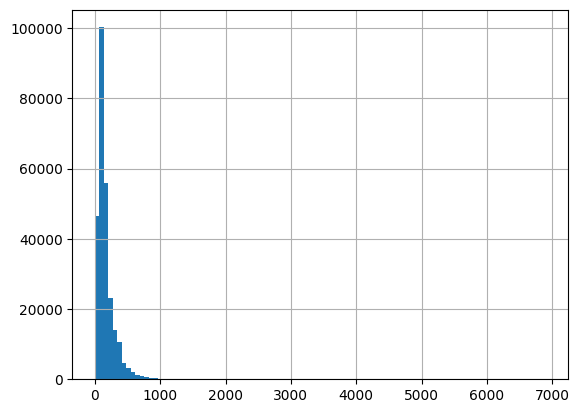

In [ ]:
customers.Spent.hist(bins = 100)

In [ ]:
customers.Spent.median()

114.0

In [ ]:
#flags to group fields
customers['VIP'] = np.where(customers['Marcas'].str.contains('5'), 1,0)
customers['Multiple_theaters'] = np.where(customers['Distinct_Cines']>1, 1,0)
customers['Visits_1'] = np.where(customers['Visits']>1, 1,0)
customers['Spent_over_mean'] = np.where(customers['Spent']> customers.Spent.mean(), 1,0)

In [ ]:
#aggregation for all fields - would probably omit multiple theaters as this doesn't bring new info
customers.groupby(['Visits_1', 'VIP', 'Multiple_theaters', 'Spent_over_mean'])['CARD_MEMBERSHIPID'].count()

Visits_1  VIP  Multiple_theaters  Spent_over_mean
0         0    0                  0                  154718
                                  1                   44631
          1    0                  0                    2610
                                  1                   15430
1         0    0                  0                   10320
                                  1                   28148
               1                  0                    1057
                                  1                    3279
          1    0                  0                      90
                                  1                    2333
               1                  0                     101
                                  1                    1714
Name: CARD_MEMBERSHIPID, dtype: int64


Tomando en cuenta los campos definidos anteriormente, propondía segmentar por número de visitas, si los clientes visitan el VIP y si gastaron en boletos por encima del promedio. Dependiendo de la estrategia de negocios que la compañía busque, nos podemos concentrar en campañas distintas dependiendo del segmento.

Por ejemplo, para la gente que solo tenga una visita, se puede generar una campaña para invitarlos a volver para que sigan comprando boletos. Por el número de clientes en esta casilla se podría esperar un buen ingreso a pesar de no necesariamente ser clientes con gastos altos. Por otro lado, a los clientes que tienen múltiples visitas y gastan por encima del promedio, se les puede buscar otorgar invitaciones a gastar en dulcería ya que muestran comportamientos de gasto elevados (si existiera una base con gastos en dulcería, se podría hacer una segmentación más refinada aquí). De igual manera, a aquellos clientes que visitan el VIP y tienen más de una visita (probablemente se podría buscar más de otra cifra pero una es buen comienzo), se les podría crear una campaña para visitas frecuentes.

## -
De vuelta al ejercicio anterior, para la pregunta sobre dónde gastan menos los clientes con respecto a precios full-price, se puede observar que en la marca de cine 7 el precio promedio está por debajo de lo normal comparado con las otras dos marcas. Esto podría deberse a múltiples razones, una que destaca podría ser por tratarse de salas muy pequeñas de empresas que se hayan adquirido por lo que el precio se sugiere menor.

/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/3460618177.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/3460618177.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/3460618177.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)


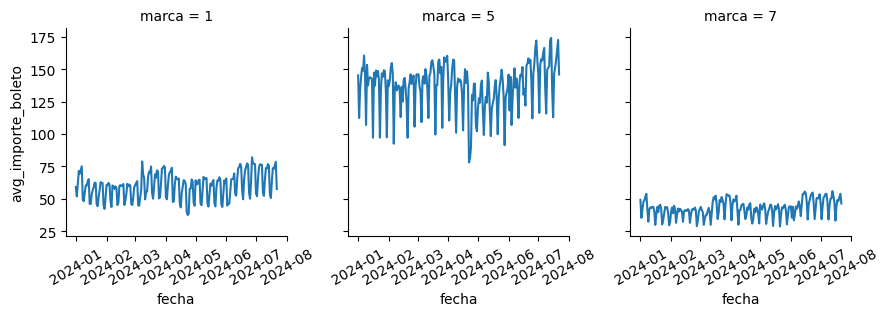

In [ ]:
#summarise the data to create a time series with daily revenue
daily_revenue = tra.groupby(['FECHA_TRANSACCION', 'ID_MARCA']).agg(
    Importe_total = pd.NamedAgg('IMPORTE_TAQUILLA', 'sum'),
    Boletos = pd.NamedAgg('BOLETOS', 'sum')
).reset_index()
daily_revenue.columns = ['fecha', 'marca', 'importe_total', 'boletos']
daily_revenue['avg_importe_boleto'] = daily_revenue['importe_total']/daily_revenue['boletos']
daily_revenue['fecha'] = pd.to_datetime(daily_revenue['fecha'])

p = sns.FacetGrid(daily_revenue, col='marca')
p.map(sns.lineplot, 'fecha', 'avg_importe_boleto')

for axes in p.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
plt.show()

Para determinar si la película afecta el precio que están dispuestos a pagar los clientes, se sugería utilizar el número de boletos vendidos como proxy para clasificar las películas, pero se optó por separar por decil de número de boletos vendidos y se comparó el precio promedio de las películas de cada decil.

Como se observa en el boxplot, parece que mientras la película tiene más boletos vendidos, el precio parece converger al tener cada vez cajas más compactas con menos outliers. Es importante notar que el precio mediano del decil 10 parece ser más alto que el de los demás deciles, mientras que en los primeros deciles el público parece tener un rango de precios dispuestos a pagar más grande. Esto probablemente está relacionado con la oferta de películas, siendo algunas de las películas de estos primeros deciles son proyectadas en pocos cines (posiblemente VIP algunas) ocasionando que su precio tenga mayor variación, mientras que en los deciles más altos el precio tiende a ser similar en todos los cines y al mismo tiempo existen más cines que la proyectan por lo que se deben ofrecer precios competitivos.

In [ ]:

#create aggregation for each movie and calculate several metrics as well as their number of tickets decile
movie_agg = tra.groupby(['TX_PELICULA_UNICA']).agg(
    total_boletos = pd.NamedAgg('BOLETOS', 'sum'),
    total_precio = pd.NamedAgg('IMPORTE_TAQUILLA', 'sum')
)

movie_agg['avg_precio'] = movie_agg['total_precio']/movie_agg['total_boletos']
movie_agg['decile'] = pd.qcut(movie_agg['total_boletos'], 10, labels=False) + 1
movie_agg['log_boletos'] = np.log(movie_agg['total_boletos'])
movie_agg['log_avg_precio'] = np.log(movie_agg['avg_precio'])

/opt/homebrew/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='decile', ylabel='avg_precio'>

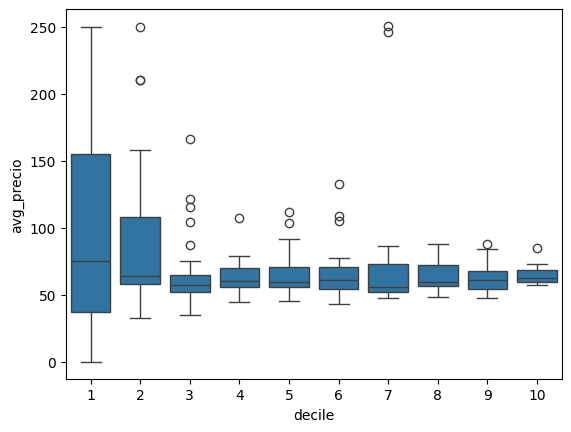

In [ ]:
#boxplot by decile
sns.boxplot(movie_agg, x = 'decile', y = 'avg_precio')

Viendo a los top performers, se puede observar que el top 50 de boletos vendidos se compone principalmente de salas normales, habiendo únicamente dos cines de marca 7 en éste. Esto está relacionado con el tamaño de las salas y el número de salas de cada cine, pero también sugiere que las estrategias de cada marca deben ser distintas para maximizar el ingreso, como se puede apreciar al ver el ingreso de los cines de marca 5 que son superiores a muchos de los cines encima de ellos en la lista.

Los cines VIP (marca 5), fijan no solo precios más altos en sus boletos, pero probablemente también en la comida ofrecida en dulcería, así como otras facilidades y servicios que inviten a los clientes a gastar más en sus salas para compensar el menor número de asientos, mientras que los cines normales pueden tener un approach de cantidad, buscando entender cómo los clientes gastarían más dado el tipo de boleto que compran.

In [ ]:
#look at top performers, the number of items pulled had to be increased up to 50 to show some brand = 5 theaters
tra.groupby(['ID_CINE', 'ID_MARCA']).agg(
    boletos= pd.NamedAgg('BOLETOS', 'sum'),
    avg_importe= pd.NamedAgg('IMPORTE_TAQUILLA', 'sum')
    ).reset_index().sort_values('boletos', ascending= False).head(50)

,ID_CINE,ID_MARCA,boletos,avg_importe
3,60,1,20488,1313037.0
42,344,1,19284,1296460.3
9,166,1,17759,1089178.7
23,234,1,17053,1050545.7
8,154,1,16906,988940.0
20,219,1,16824,1384747.5
88,936,1,15711,1173407.5
35,309,1,15492,1075498.0
11,168,1,14880,972952.0
10,167,1,14407,813861.5


## Task 3

What about email communications? Check the following:
- Do certain customers receive more emails? Why do you think that is?
- Do you think emails influence customer attendance? Do you think emails influence how much they're spending on movie tickets? Make a formal hypothesis and test it.
- Make a regression that tries to explain the effect of communications on movie visits. Make sure you're controlling for ticket prices, the segment to which the customer belongs, and the type of content on any given week. Discuss your conclusion and provide evidence that supports it. Explain any coefficient you think is relevant, along with statistical significance.

Dado que existen clientes que tienen hasta cinco emails recibidos y al unir con la base de transacciones del año en curso solo aparecen clientes con tres correos, probablemente los clientes que más reciben son aquellos a quienes se busca que sigan comprando boletos y no lo han hecho recientemente. Parece que hay varios clientes para los que sí han tenido éxito pero les tuvieron que enviar hasta tres correos para convertir.

In [ ]:
email = pd.read_csv('/Users/Stefano_1/Documents/Data/Cinepolis/Emails.csv')

In [ ]:
emails_sent = email.groupby('SubscriberKeyH')['EventDate'].nunique().reset_index().sort_values('EventDate', ascending= False)
emails_sent.head()

,SubscriberKeyH,EventDate
177778,1a8438c3d4523273c34e81d912412a6c2579b03fde608b...,5
202370,1e2fe700d4b8fc490bd0ab08f58113a75a800ca34bd62d...,5
1091563,a2877bac38090165073bb888b9d566b0db4a9a0dc67596...,5
1167542,add96c9ca2cd26cb227cd018d4d56a3f5a6e6aeb31b784...,5
1113992,a5d63d988c5a4222bf32d041739b4a8c79d9ed32da91b1...,5


In [ ]:
#j0in customers data to email date
customers = customers.merge(cus, how = 'outer', left_on = 'CARD_MEMBERSHIPID', right_on = 'CARD_MEMBERSHIPID')

customers_comms = customers.merge(emails_sent, how = 'outer', left_on = 'SubscriberKey', right_on = 'SubscriberKeyH')


In [ ]:
customers_comms.rename(columns={'EventDate':'emails'}, inplace=True)

In [ ]:
customers_comms.head()

,CARD_MEMBERSHIPID,Marcas,Distinct_Cines,Visits,Spent,Boletos,VIP,Multiple_theaters,Visits_1,Spent_over_mean,SubscriberKey,SubscriberKeyH,emails
0,000106af97d98ed498a1e0a57abe8ef355e398a53a1cd9...,[1],1.0,1.0,85.0,2.0,0.0,0.0,0.0,0.0,d2c25cea81904391043a56bb7e575df6331fb120042301...,NaN,NaN
1,0001d0121dbac20ce03daf9e602e3d30c2b8f6af91af0b...,[1],1.0,2.0,234.0,4.0,0.0,0.0,1.0,1.0,7b271d05cc5f2121bff6432af2bff13479640997980dab...,NaN,NaN
2,0001d5513d3c4ad1c33d3091dc22fbc5c7094fbf9066ed...,[1],1.0,1.0,80.0,1.0,0.0,0.0,0.0,0.0,cf81b62ae58b343c458898de6ce395d940d517ccb3a2f6...,NaN,NaN
3,0002a429f0ac9ceb47bcc659efb13985fa4467f2c4e231...,[1],1.0,1.0,92.0,2.0,0.0,0.0,0.0,0.0,fb6a01f8a78e5491d14688cabbdd514176e153c0c512c7...,NaN,NaN
4,0003314dbc6a79aca19aef736204b58626af7fbeaf0748...,[1],1.0,1.0,158.0,2.0,0.0,0.0,0.0,0.0,f417dea78a7b4e4a640c5ab5c200e28822a78032e1560b...,f417dea78a7b4e4a640c5ab5c200e28822a78032e1560b...,1.0


In [ ]:
#fill nas to help the model
customers_comms['Visits'] = customers_comms['Visits'].fillna(0)
customers_comms['Distinct_Cines'] = customers_comms['Distinct_Cines'].fillna(0)
customers_comms['Spent'] = customers_comms['Spent'].fillna(0)
customers_comms['Boletos'] = customers_comms['Boletos'].fillna(0)


In [ ]:
#check data
customers_comms[['CARD_MEMBERSHIPID', 'Marcas', 'Distinct_Cines', 'Visits', 'Spent','Boletos', 'emails']].sort_values('emails', ascending= False).head(10)

,CARD_MEMBERSHIPID,Marcas,Distinct_Cines,Visits,Spent,Boletos,emails
5731276,NaN,<NA>,0.0,0.0,0.0,0.0,5.0
5731271,NaN,<NA>,0.0,0.0,0.0,0.0,5.0
5731269,NaN,<NA>,0.0,0.0,0.0,0.0,5.0
5731268,NaN,<NA>,0.0,0.0,0.0,0.0,5.0
5731267,NaN,<NA>,0.0,0.0,0.0,0.0,5.0
5731266,NaN,<NA>,0.0,0.0,0.0,0.0,5.0
5731265,NaN,<NA>,0.0,0.0,0.0,0.0,5.0
5731264,NaN,<NA>,0.0,0.0,0.0,0.0,5.0
5731263,NaN,<NA>,0.0,0.0,0.0,0.0,5.0
5731262,NaN,<NA>,0.0,0.0,0.0,0.0,5.0


In [ ]:
customers_comms['emails'] = customers_comms['emails'].fillna(0)

La primera hipótesis que se hace es verificar si el número de mails recibidos afecta la compra de boletos. Para esto se llevará acabo una regresión lineal simple únicamente comparando el número de boletos comprados contra el número de emails recibidos. Esto es un test de hipótesis simple, que será profundizado en el siguiente punto.

Los resultados muestran que aunque existe una relación negativa y significativa estadísticamente, el modelo de regresión apenas y es capaz de explicar una fracción mínima de la varianza de las variables. Una posible explicación es que el número de observaciones es demasiado grande por lo que se genera demasiado ruido, además de que solo existen seis posibles valores para el número de emails: 0 a 5. Para entender mejor esta relación, se podría calcular una regresión lineal con más variables y la segmentación hecha previamente, como se sugiere en las instrucciones.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#create variables for model
x = (customers_comms['emails'] - customers_comms['emails'].mean())/customers_comms['emails'].std()
x = sm.add_constant(x)
y = (customers_comms['Boletos'] - customers_comms['Boletos'].mean())/customers_comms['Boletos'].std()

res = sm.OLS(y, x).fit()


In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Boletos   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                 2.351e+04
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:54:11   Log-Likelihood:            -9.9154e+06
No. Observations:             6996184   AIC:                         1.983e+07
Df Residuals:                 6996182   BIC:                         1.983e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.147e-12      0.000   5.69e-09      1.0

Utilizando más variables así como los segmentos que se generaron, se mejora el modelo de manera notoria. Ahora se puede explicar 31% de la variación de la variable objetivo con él y todas las variables utilizadas son estadísticamente significativas. Es importante notar que a pesar de que se estandarizaron varias variables, al final varias no fueron utilizadas porque están altamente correlacionadas con el número de boletos, como lo son el ingreso y el número de visitas, por lo que la única variable numérica además de correos es el precio promedio pagado.

Interpretando los coeficientes del modelo,
- se puede ver que el número de correos recibidos tiene un coeficiente positivo de magnitud relativamente pequeña, por lo que su influencia en el número de boletos comprados no es tan importante pero sigue siendo significativa.
- el precio promedio y el segmento de clientes que han visitado cines VIP tienen una influencia negativa en el número de boletos comprados, ambas se pueden interpretar de manera similar dado que al aumentar el precio o ir a cines VIP -que son más caros- los clientes van a comprar menos boletos en promedio
- los segmentos de clientes que tienen más de una visita y aquellos que gastan por encima del promedio, tienden a incrementar el número de boletos comprados, esto se explica fácilmente como que son clientes frecuentes. Estos segmentos de clientes van a tener un peso importante en el número de boletos comprados como lo muestran sus coeficientes por la naturaleza de su definición.

Existen interacciones que sería importante considerar en futuros modelos, así como pensar en determinar un límite de tiempo de conversión, es decir cuántos días después de recibir un correo pueden considerarse para asumir que el correo tuvo influencia en la decisión de comprar un boleto. Posiblemente con información sobre si los correos fueron recibidos, abiertos y tuvieros clicks se podría saber con mayor precisión esto.

Otra alternativa sería crear modelos jerárquicos para identificar mejor la influencia en los clientes de acuerdo a su región o los cines más cercanos a ellos así como posiblemente las películas en cuestión y los clusters a los que pertenecen.

In [ ]:
#create dataframe for new model with dummies
customers_comms_lm = customers_comms.dropna()
customers_comms_lm = pd.get_dummies(customers_comms_lm, columns=['Marcas'])

In [ ]:
#standardize values. Some were not used in the end
customers_comms_lm['emails'] = (customers_comms_lm['emails'] - customers_comms_lm['emails'].mean())/customers_comms_lm['emails'].std()
customers_comms_lm['Visits'] = (customers_comms_lm['Visits'] - customers_comms_lm['Visits'].mean())/customers_comms_lm['Visits'].std()
customers_comms_lm['Boletos'] = (customers_comms_lm['Boletos'] - customers_comms_lm['Boletos'].mean())/customers_comms_lm['Boletos'].std()
customers_comms_lm['Distinct_Cines'] = (customers_comms_lm['Distinct_Cines'] - customers_comms_lm['Distinct_Cines'].mean())/customers_comms_lm['Distinct_Cines'].std()
customers_comms_lm['Spent'] = (customers_comms_lm['Spent'] - customers_comms_lm['Spent'].mean())/customers_comms_lm['Spent'].std()

customers_comms_lm['avg_price'] = customers_comms_lm['Spent']/customers_comms_lm['Boletos']

In [ ]:
formula = 'Boletos ~ emails + avg_price  + VIP + Visits_1 + Spent_over_mean -1'
res_2 = smf.ols(formula, data = customers_comms_lm).fit()

In [ ]:
print(res_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                Boletos   R-squared (uncentered):                   0.310
Model:                            OLS   Adj. R-squared (uncentered):              0.310
Method:                 Least Squares   F-statistic:                              1978.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):                        0.00
Time:                        20:54:14   Log-Likelihood:                         -27188.
No. Observations:               22041   AIC:                                  5.439e+04
Df Residuals:                   22036   BIC:                                  5.443e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

## Final task
What are some questions you have? Perform any analysis that piqued your interest. Get as fancy as you want, we want you to showcase what you can do. State a relevant question, how you would approach it if you had more time, explain your current solution, and discuss conclusions.

Para este ejercicio, se trató de buscar si alguno de los clusters generados se asimilaba a los que haría un modelo de clustering, por lo que se empezó por crear un algoritmo de k means en el que se busca el número óptimo de clusters de acuerdo a la métrica del codo. Se encontró que doss clusters era lo sugerido por lo que después de creados los clusters y etiquetados en la muestra original se utilizó, para fácil visualización, un método de TSNE muestreado debido al elevado número de observaciones.

Al generar la visualización de TSNE y comparar el etiquetado de color contra los distintos clusters propuestos en los ejercicios anteriores, se encontró una semejanza importante con el de clientes que gastan por encima de la media, donde la similitud es casi total. Esto sugiere que esta métrica puede ser de gran importancia al tratar de entender similaritud entre clientes, al ser un proxy de su interés por las películas y/o su nivel de ingreso. Los siguientes pasos a esto serían ver el poder de predicción de este dummy generado por el algoritmo de k means en la regresión del ejercicio anterior para poder entender mejor cómo se comportan los clientes y el parecido que existe entre ellos.

In [ ]:
#import libraries and generate dataframe with only numeric values
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

customers_comms_km = customers_comms[['Distinct_Cines', 'Visits', 'Spent', 'Boletos', 'emails']]

In [ ]:
#loop over models with different number of clusters and store their inertia in a list
clusters = range(1,10)

iner = []

for c in clusters:
    km = KMeans(n_clusters = c, random_state= 16)
    km.fit(customers_comms_km)
    iner.append(km.inertia_)

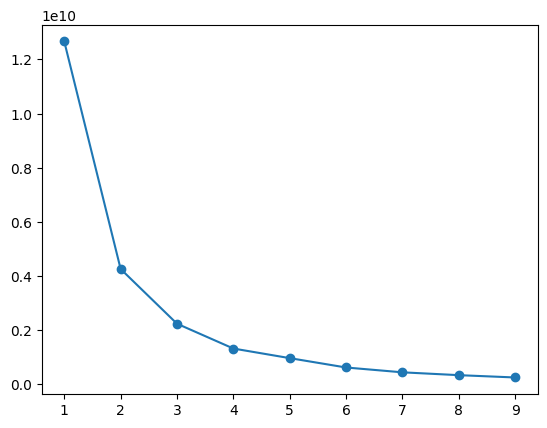

In [ ]:
#based on the elbow method, we pick two clusters
plt.plot(clusters, iner, marker='o')

In [ ]:
#predict the labels for the two - means clusters
km = KMeans( n_clusters= 2, random_state= 16)
km.fit(customers_comms_km)
y = km.predict(customers_comms_km)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
#sample from the original set and run a tsne model on it to reduce its dimensions to two to be able to visualize them
customers_comms_km['y'] = y
X_sampled = shuffle(customers_comms_km, random_state=16, n_samples=150000)
y_sampled = X_sampled['y']
X_sampled = X_sampled.drop('y', axis = 1)
tsne = TSNE(n_components=2, random_state=16)
X_embedded = tsne.fit_transform(X_sampled)

/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_71017/2622125886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_comms_km['y'] = y


In [ ]:
#create dataframe with custom created clusters
customers_comms_y = customers_comms[['Visits_1', 'Spent_over_mean', 'VIP']]
customers_comms_y = shuffle(customers_comms_y, random_state= 16,  n_samples=150000)

Text(0, 0.5, 'Spent over mean cluster')

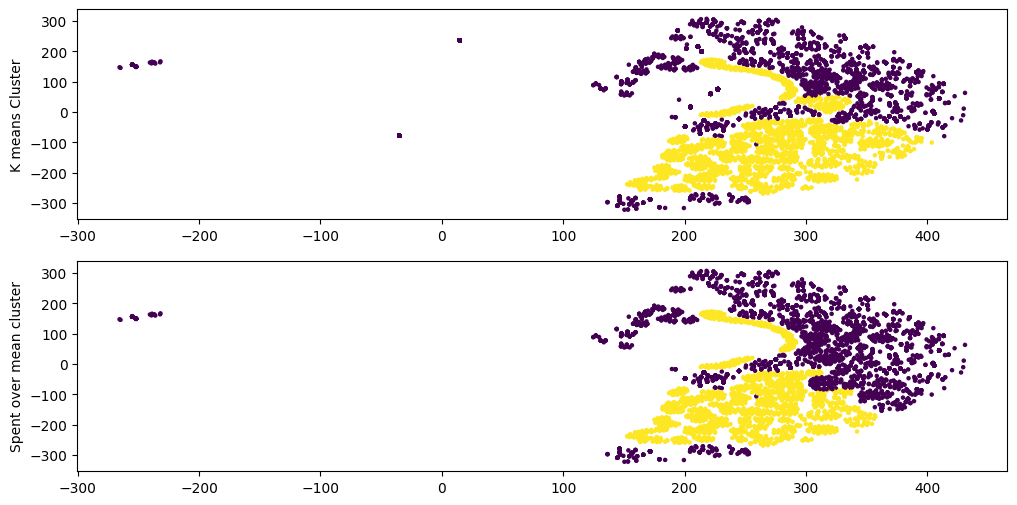

In [ ]:
#plot side by side the generated labels and the custom created clusters
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
ax1.scatter(X_embedded[:, 0], X_embedded[:, 1], c= y_sampled,  s=5, cmap='viridis')
#ax1.title('t-SNE visualization of KMeans clustering with 2 Clusters using the predicted clusters')
ax1.set_ylabel('K means Cluster')

ax2.scatter(X_embedded[:, 0], X_embedded[:, 1], c= customers_comms_y['Spent_over_mean'],  s=5, cmap='viridis')
#ax2.title('t-SNE visualization of KMeans clustering with 2 Clusters using a generated clusters')
ax2.set_ylabel('Spent over mean cluster')

Originalmente, la idea era generar un modelo para predecir la probabilidad de conversión después del envío de un correo, sin embargo se presentó una dificultad para generar joins basados en fechas que no coincidían. Es decir, se buscaba unir la base de transacciones con la base de correos enviados a través de id de cliente y por otro lado buscando determinar cuál era la fecha de envío de correo anterior más cercana a la fecha de compra para así entrenar un modelo que basado en las características del cliente pudiera determinar qué probabilidad existía de que éste convirtiera en los próximos n días. Con más tiempo, se podría generar esta tabla y así optimizar el envío de correos electrónicos a aquellos clientes que tengan probabilidad de conversión por arriba de un threshold, posiblemente a través de generar un experimento para comparar este grupo contra un control.